# Scorecard creation using Inbuilt library

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns=None

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
import toad

In [3]:
df = pd.read_csv("loan_data_2007_2014.csv")

In [4]:
df.drop(["Unnamed: 0",'id','member_id' ,'url','desc'], axis = 1, inplace = True)
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(466285, 70)

In [6]:
df = df.loc[: 50000,:]
df.shape

(50001, 70)

In [7]:
toad.detect(df)[:30]

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
loan_amnt,int64,50001,0.00%,950,11644.930101,7676.575478,500.0,1200.0,3400.0,10000.0,15250.0,24000.0,35000.0,35000.0
funded_amnt,int64,50001,0.00%,1077,11416.830663,7478.137771,500.0,1200.0,3300.0,10000.0,15000.0,22025.0,35000.0,35000.0
funded_amnt_inv,float64,50001,0.00%,9308,10835.397185,7514.347754,0.0,375.0,2800.0,9500.0,14975.0,21375.0,34975.0,35000.0
term,object,50001,0.00%,2,36 months:74.02%,60 months:25.98%,None,None,None,None,None,None,36 months:74.02%,60 months:25.98%
int_rate,float64,50001,0.00%,419,12.499102,3.893086,5.42,5.42,7.49,12.42,14.98,17.57,22.4,26.06
installment,float64,50001,0.00%,18578,342.396708,221.41981,15.67,38.54,102.86,298.67,460.56,659.37,1025.04,1407.01
grade,object,50001,0.00%,7,B:29.05%,A:22.58%,C:21.79%,D:14.64%,E:7.86%,C:21.79%,D:14.64%,E:7.86%,F:2.96%,G:1.12%
sub_grade,object,50001,0.00%,35,B3:6.96%,B5:6.53%,A4:6.41%,A5:6.32%,B4:6.08%,G1:0.32%,G2:0.24%,G4:0.20%,G3:0.18%,G5:0.18%
emp_title,object,50001,6.17%,35068,Teacher:0.34%,US Army:0.28%,Bank of America:0.23%,Manager:0.20%,IBM:0.14%,Video Teleconferencing Technician :0.00%,Rochdale Investment Management:0.00%,D&D cabinets:0.00%,Hewlett Foundation:0.00%,Wagon Mound Schools:0.00%
emp_length,object,50001,2.88%,11,10+ years:23.87%,< 1 year:11.29%,2 years:10.78%,3 years:9.90%,1 year:8.06%,5 years:7.94%,6 years:5.52%,7 years:4.59%,8 years:3.87%,9 years:3.28%


In [8]:
# 0 means bad/default and 1 means good/non-default
df['good_bad'] = np.where(
    df['loan_status'].isin(
        ['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),
        1,0)

In [9]:
df.drop(['loan_status'], axis = 1, inplace = True)

In [10]:
toad.quality(df, 'good_bad', iv_only = True)[:20]

,iv,gini,entropy,unique
recoveries,7.976906,NaN,NaN,4756.0
collection_recovery_fee,7.068525,NaN,NaN,3077.0
emp_title,6.967810,NaN,NaN,35069.0
title,4.659662,NaN,NaN,23150.0
total_rec_prncp,2.510800,NaN,NaN,14588.0
last_pymnt_amnt,1.907207,NaN,NaN,41028.0
total_pymnt,1.209230,NaN,NaN,49137.0
total_pymnt_inv,0.911171,NaN,NaN,48749.0
last_pymnt_d,0.850873,NaN,NaN,99.0
sub_grade,0.350670,NaN,NaN,35.0


In [11]:
df_select, dropped = toad.selection.select(df, target = 'good_bad', empty = 0.55, iv = 0.05, corr = 0.75, return_drop = True)

In [12]:
dropped

{'empty': array(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
        'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
        'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
        'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
        'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
        'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
        'inq_fi', 'total_cu_tl', 'inq_last_12m'], dtype='<U27'),
 'iv': array(['loan_amnt', 'funded_amnt', 'installment', 'emp_length',
        'home_ownership', 'verification_status', 'pymnt_plan',
        'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec',
        'revol_bal', 'total_acc', 'initial_list_status',
        'collections_12_mths_ex_med', 'policy_code', 'application_type',
        'acc_now_delinq'], dtype=object),
 'corr': array(['total_pymnt_inv', 'total_pymnt', 'funded_amnt_inv', 'out_prncp',
        'collection_recovery_fee'], dtype=objec

In [13]:
df_select.drop(['emp_title', 'title', 'zip_code', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis = 1, inplace = True)
df_select.shape

(50001, 16)

In [14]:
df['last_pymnt_d'].nunique()

98

In [15]:
c = toad.transform.Combiner()

In [16]:
c.fit(df_select, y = 'good_bad', method = 'chi', min_samples = 0.05)

In [17]:
c.export()

{'term': [[' 36 months'], [' 60 months']],
 'int_rate': [8.49, 9.76, 11.22, 13.99, 16.29],
 'grade': [['A'], ['B'], ['C'], ['D'], ['E', 'F', 'G']],
 'sub_grade': [['A1', 'A2', 'A3', 'A4'],
  ['A5', 'B1'],
  ['B2', 'B3'],
  ['B5', 'B4'],
  ['C1', 'C2', 'C4', 'C5', 'C3', 'D1'],
  ['D2', 'D3', 'E3', 'D4', 'D5'],
  ['E2',
   'E5',
   'E1',
   'F1',
   'F2',
   'F3',
   'E4',
   'G1',
   'F4',
   'G2',
   'G4',
   'G5',
   'G3',
   'F5']],
 'annual_inc': [36900.0, 60008.0, 95030.0],
 'issue_d': [['Dec-13',
   'Mar-10',
   'Dec-09',
   'Feb-10',
   'Apr-10',
   'Jul-07',
   'Aug-09'],
  ['Aug-08',
   'Dec-10',
   'Jun-07',
   'Mar-09',
   'Sep-09',
   'Feb-11',
   'Jul-10',
   'Jan-11',
   'Feb-09',
   'Jan-10',
   'Aug-11',
   'Jul-09',
   'Apr-11',
   'May-09',
   'Jun-09',
   'Nov-10',
   'Mar-11',
   'May-10',
   'Oct-11',
   'Jun-11',
   'Aug-10',
   'Nov-09',
   'Apr-09',
   'Jul-11',
   'Sep-11',
   'Nov-11',
   'Jan-09',
   'Oct-10',
   'Dec-08'],
  ['Oct-09',
   'May-11',
   'Oct-08

In [18]:
from toad.plot import bin_plot

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='prop'>

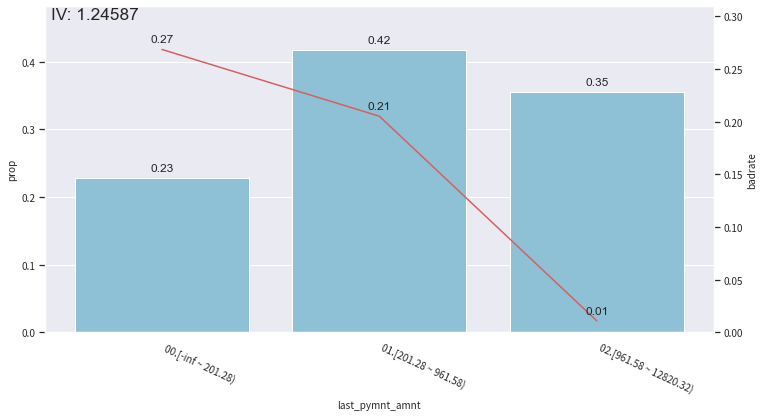

In [19]:
bin_plot(c.transform(df_select[['last_pymnt_amnt','good_bad']], labels=True), x='last_pymnt_amnt', target='good_bad')

<AxesSubplot:xlabel='recoveries', ylabel='prop'>

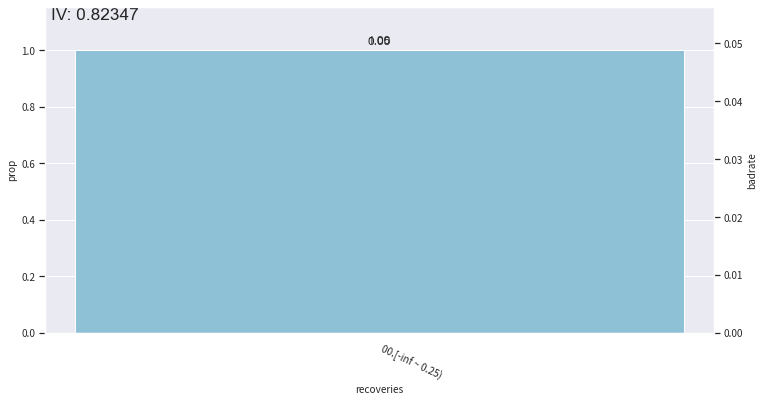

In [20]:
bin_plot(c.transform(df_select[['recoveries','good_bad']], labels=True), x='recoveries', target='good_bad')

<AxesSubplot:xlabel='total_rec_late_fee', ylabel='prop'>

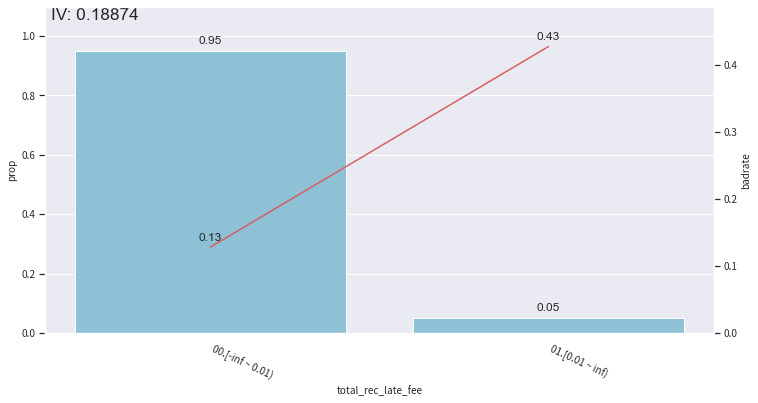

In [21]:
bin_plot(c.transform(df_select[['total_rec_late_fee','good_bad']], labels=True), x='total_rec_late_fee', target='good_bad')

<AxesSubplot:xlabel='total_rec_int', ylabel='prop'>

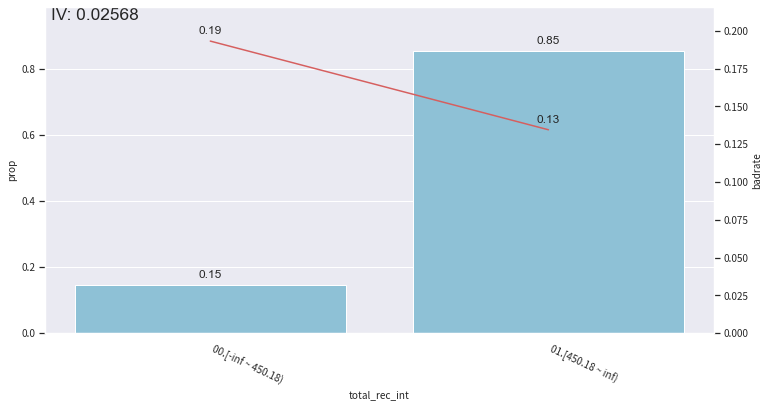

In [22]:
bin_plot(c.transform(df_select[['total_rec_int','good_bad']], labels=True), x='total_rec_int', target='good_bad')

<AxesSubplot:xlabel='total_rec_prncp', ylabel='prop'>

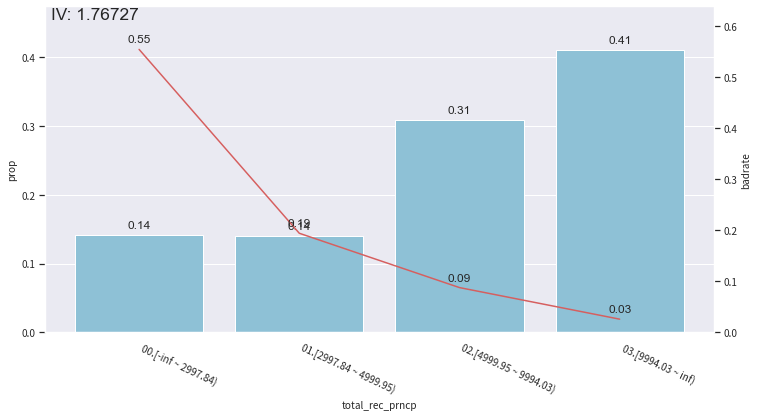

In [23]:
bin_plot(c.transform(df_select[['total_rec_prncp','good_bad']], labels=True), x='total_rec_prncp', target='good_bad')

<AxesSubplot:xlabel='out_prncp_inv', ylabel='prop'>

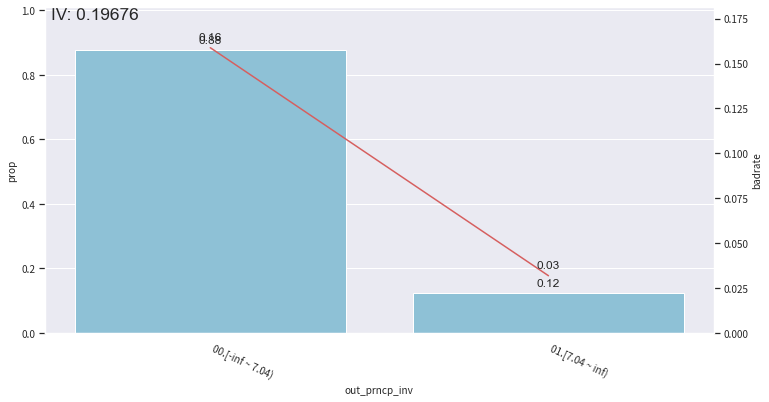

In [24]:
bin_plot(c.transform(df_select[['out_prncp_inv','good_bad']], labels=True), x='out_prncp_inv', target='good_bad')

<AxesSubplot:xlabel='revol_util', ylabel='prop'>

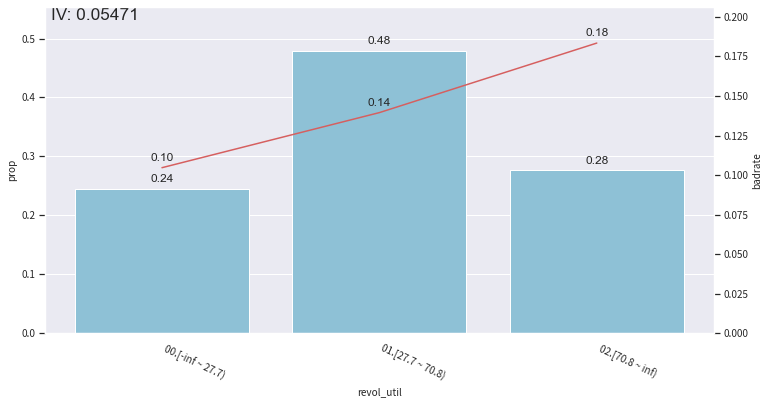

In [25]:
bin_plot(c.transform(df_select[['revol_util','good_bad']], labels=True), x='revol_util', target='good_bad')

<AxesSubplot:xlabel='inq_last_6mths', ylabel='prop'>

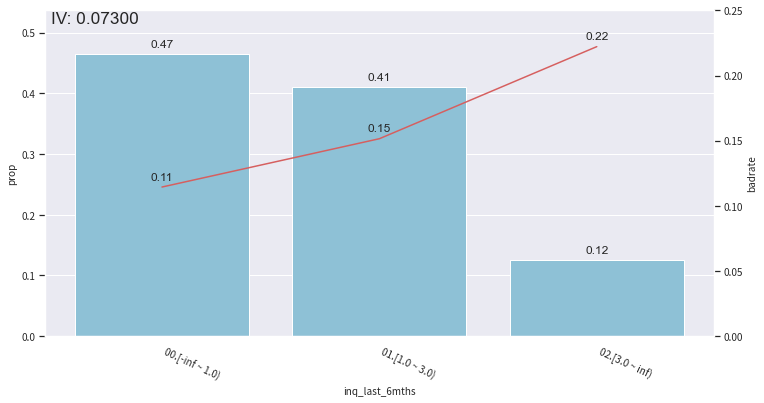

In [26]:
bin_plot(c.transform(df_select[['inq_last_6mths','good_bad']], labels=True), x='inq_last_6mths', target='good_bad')

<AxesSubplot:xlabel='purpose', ylabel='prop'>

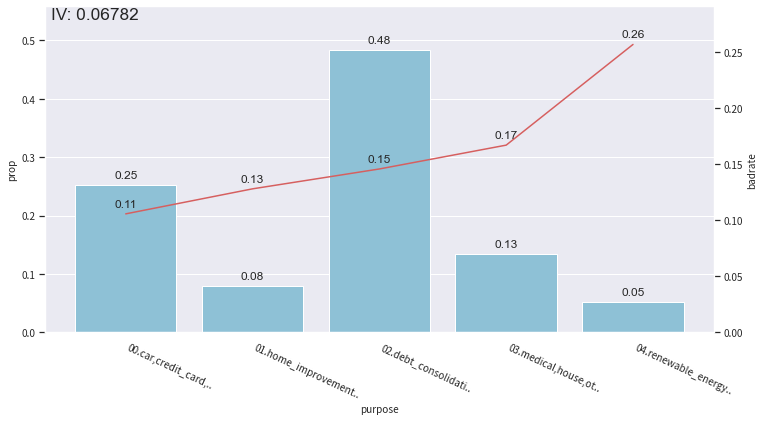

In [27]:
bin_plot(c.transform(df_select[['purpose','good_bad']], labels=True), x='purpose', target='good_bad')

<AxesSubplot:xlabel='issue_d', ylabel='prop'>

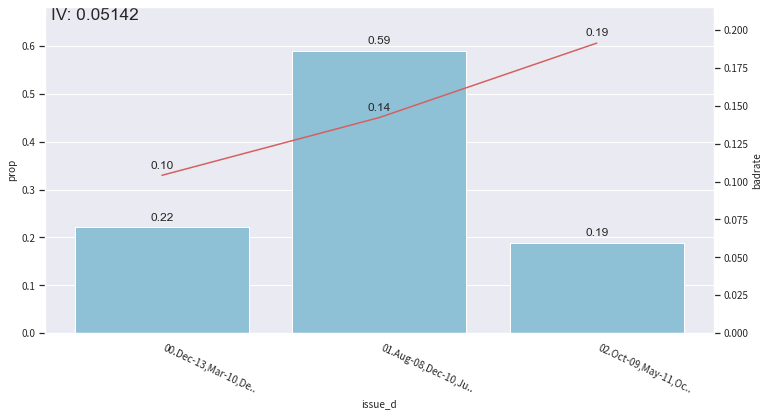

In [28]:
bin_plot(c.transform(df_select[['issue_d','good_bad']], labels=True), x='issue_d', target='good_bad')

<AxesSubplot:xlabel='annual_inc', ylabel='prop'>

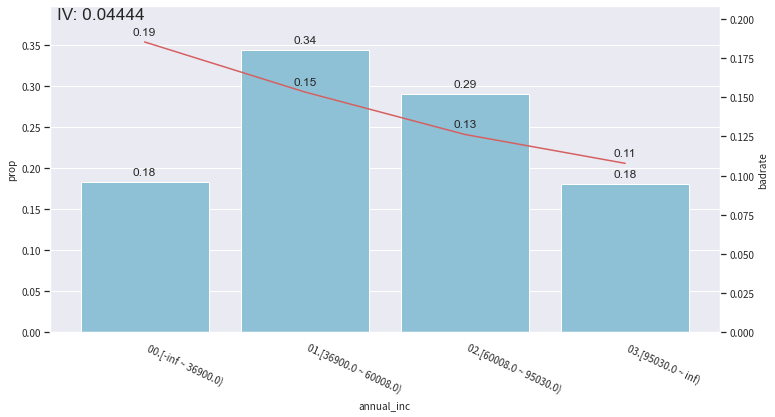

In [29]:
bin_plot(c.transform(df_select[['annual_inc','good_bad']], labels=True), x='annual_inc', target='good_bad')

<AxesSubplot:xlabel='sub_grade', ylabel='prop'>

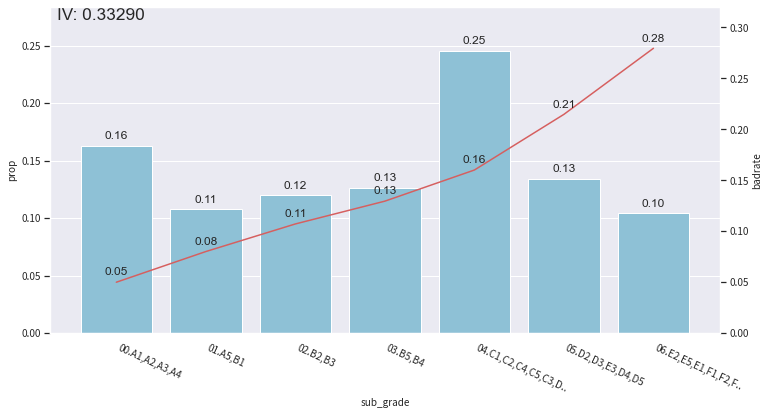

In [30]:
bin_plot(c.transform(df_select[['sub_grade','good_bad']], labels=True), x='sub_grade', target='good_bad')

<AxesSubplot:xlabel='grade', ylabel='prop'>

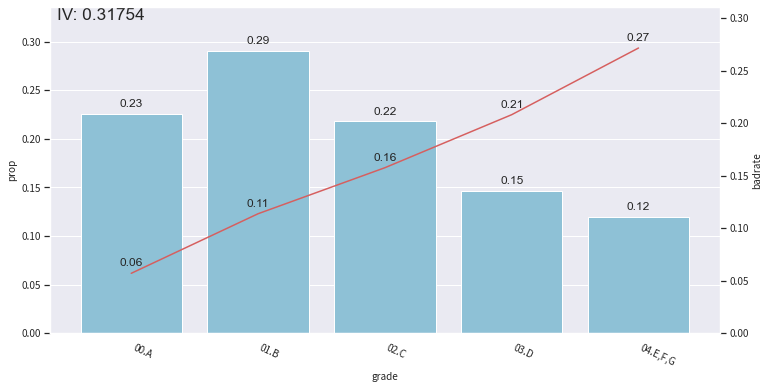

In [31]:
bin_plot(c.transform(df_select[['grade','good_bad']], labels=True), x='grade', target='good_bad')

<AxesSubplot:xlabel='int_rate', ylabel='prop'>

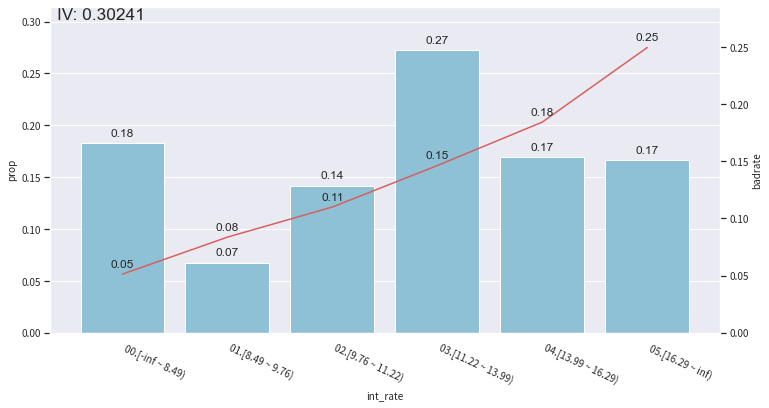

In [32]:
bin_plot(c.transform(df_select[['int_rate','good_bad']], labels=True), x='int_rate', target='good_bad')

In [33]:
transer = toad.transform.WOETransformer()

In [34]:
df_woe = transer.fit_transform(c.transform(df_select), df_select['good_bad'], exclude=['good_bad'])

In [35]:
df_woe.shape

(50001, 16)

In [36]:
df_woe.head()

,term,int_rate,grade,sub_grade,annual_inc,issue_d,purpose,inq_last_6mths,revol_util,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,good_bad
0,-0.225102,-0.301588,-0.263422,-0.330650,0.309107,0.3489,-0.343668,0.067149,0.296529,0.122919,-0.552133,-0.071338,-0.127967,-1.185738,0.787945,0
1,0.498272,0.301745,0.112988,0.131985,0.309107,0.3489,-0.343668,0.536935,-0.356486,0.122919,2.006253,0.360806,-0.127967,10.300775,0.787945,1
2,-0.225102,0.301745,0.112988,0.131985,0.309107,0.3489,0.728814,0.067149,0.296529,0.122919,2.006253,-0.071338,-0.127967,-1.185738,0.435700,0
3,-0.225102,0.024864,0.112988,0.131985,0.081618,0.3489,0.184475,0.067149,-0.356486,0.122919,-1.837474,-0.071338,1.497689,-1.185738,0.435700,0
4,0.498272,0.024864,-0.263422,-0.115608,-0.144376,0.3489,0.184475,-0.256280,-0.029762,-1.626343,2.006253,-0.071338,-0.127967,-1.185738,0.787945,0


In [37]:
final_data = toad.selection.stepwise(df_woe,target = 'good_bad', estimator='ols', direction = 'both', criterion = 'aic')

In [38]:
col = list(final_data.drop(['good_bad'],axis=1).columns)

In [39]:
col

['term',
 'int_rate',
 'grade',
 'issue_d',
 'inq_last_6mths',
 'revol_util',
 'out_prncp_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'last_pymnt_amnt']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(final_data, df_woe['good_bad'], test_size = 0.2, random_state = 0)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((40000, 12), (10001, 12), (40000,), (10001,))

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [44]:
pred_test = lr.predict_proba(xtest)[:,1]

In [45]:
pred_test

array([0.00048949, 0.00012038, 0.00043492, ..., 0.00074198, 0.00033525,
       0.00027115])

In [46]:
ytest

39178    0
14283    0
9945     0
5554     0
7552     0
        ..
49989    0
10027    0
46482    0
26607    0
2217     0
Name: good_bad, Length: 10001, dtype: int32

In [47]:
ytest.reset_index(drop = True, inplace = True)
ytest.head()

0    0
1    0
2    0
3    0
4    0
Name: good_bad, dtype: int32

In [48]:
df_actual_predicted_probs = pd.concat([ytest, pd.DataFrame(pred_test)], axis = 1)

In [49]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [50]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,0,0.000489
1,0,0.000120
2,0,0.000435
3,0,0.000159
4,0,0.000028


In [51]:
tr = 0.85
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [52]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,8539,0
1,0,1462


In [53]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.853815,0.000000
1,0.000000,0.146185


In [54]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] 

0.8538146185381462

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

In [56]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


(array([0.        , 0.        , 0.        , ..., 0.99941445, 0.99964867,
        1.        ]),
 array([0.00000000e+00, 6.83994528e-04, 1.36798906e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99999722e+00, 9.99997215e-01, 9.99997098e-01, ...,
        1.42550955e-05, 1.39750089e-05, 1.34919426e-05]))

In [57]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

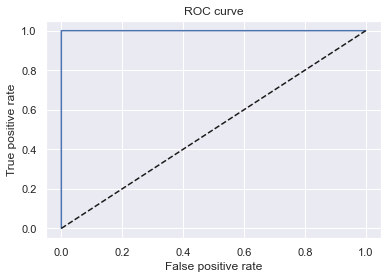

In [59]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [60]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

1.0

In [61]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [62]:
df_actual_predicted_probs['Cumulative_N_Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative_N_Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative_N_Bad'] = df_actual_predicted_probs['Cumulative_N_Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs.columns

Index(['index', 'loan_data_targets_test', 'y_hat_test_proba', 'y_hat_test',
       'Cumulative_N_Population', 'Cumulative_N_Good', 'Cumulative_N_Bad'],
      dtype='object')

In [63]:
df_actual_predicted_probs['Cumulative_Perc_Population'] = df_actual_predicted_probs['Cumulative_N_Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative_Perc_Good'] = df_actual_predicted_probs['Cumulative_N_Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative_Perc_Bad'] = df_actual_predicted_probs['Cumulative_N_Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative_N_Population,Cumulative_N_Good,Cumulative_N_Bad,Cumulative_Perc_Population,Cumulative_Perc_Good,Cumulative_Perc_Bad
0,0,0,0.000489,0,1,0,1,0.0001,0.0,0.000117
1,1,0,0.000120,0,2,0,2,0.0002,0.0,0.000234
2,2,0,0.000435,0,3,0,3,0.0003,0.0,0.000351
3,3,0,0.000159,0,4,0,4,0.0004,0.0,0.000468
4,4,0,0.000028,0,5,0,5,0.0005,0.0,0.000586


Text(0.5, 1.0, 'Gini')

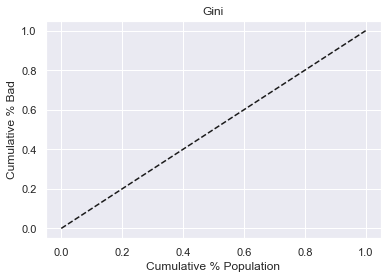

In [71]:
# Plot Gini
#plt.plot(df_actual_predicted_probs['Cumulative_Perc_Population'], df_actual_predicted_probs['Cumulative_Perc_Bad'],linestyle = '-', color = 'r')
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative_Perc_Population'], df_actual_predicted_probs['Cumulative_Perc_Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [65]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

1.0

In [66]:
KS = max(df_actual_predicted_probs['Cumulative_Perc_Bad'] - df_actual_predicted_probs['Cumulative_Perc_Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.00831374962772402

In [67]:
from toad.metrics import KS, AUC

In [68]:
print('test KS',KS(pred_test, ytest))
print('test AUC',AUC(pred_test, ytest))

test KS 1.0
test AUC 1.0


In [69]:
# Group the predicted scores in bins with same number of samples in each (i.e. "quantile" binning)
toad.metrics.KS_bucket(pred_test, ytest, bucket=10, method = 'quantile')

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,total_prop,cum_bad_rate,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,0.000013,0.000078,0,998,998,0.000000,1.000000,0.000000,0.000000,0.116876,0.09979,0.000000,0.146185,0.000000,1.000000,0.116876,1.000000,0.09979,1.00000,0.116876,0.000000,1.000000
1,0.000079,0.000114,0,991,991,0.000000,1.000000,0.000000,0.000000,0.116056,0.09909,0.000000,0.162390,0.000000,1.000000,0.232931,0.883124,0.19888,0.90021,0.232931,0.000000,1.110852
2,0.000114,0.000161,0,998,998,0.000000,1.000000,0.000000,0.000000,0.116876,0.09979,0.000000,0.182476,0.000000,1.000000,0.349807,0.767069,0.29867,0.80112,0.349807,0.000000,1.248253
3,0.000161,0.000230,0,1013,1013,0.000000,1.000000,0.000000,0.000000,0.118632,0.10129,0.000000,0.208440,0.000000,1.000000,0.468439,0.650193,0.39996,0.70133,0.468439,0.000000,1.425863
4,0.000231,0.000299,0,1000,1000,0.000000,1.000000,0.000000,0.000000,0.117110,0.09999,0.000000,0.243626,0.000000,1.000000,0.585549,0.531561,0.49995,0.60004,0.585549,0.000000,1.666556
5,0.000299,0.000395,0,1001,1001,0.000000,1.000000,0.000000,0.000000,0.117227,0.10009,0.000000,0.292342,0.000000,1.000000,0.702776,0.414451,0.60004,0.50005,0.702776,0.000000,1.999800
6,0.000395,0.000556,0,1000,1000,0.000000,1.000000,0.000000,0.000000,0.117110,0.09999,0.000000,0.365500,0.000000,1.000000,0.819885,0.297224,0.70003,0.39996,0.819885,0.000000,2.500250
7,0.000556,0.000961,0,998,998,0.000000,1.000000,0.000000,0.000000,0.116876,0.09979,0.000000,0.487333,0.000000,1.000000,0.936761,0.180115,0.79982,0.29997,0.936761,0.000000,3.333667
8,0.000962,0.999923,461,540,1001,0.460539,0.539461,0.853704,0.315321,0.063239,0.10009,0.051222,0.730270,0.315321,1.000000,1.000000,0.063239,0.89991,0.20018,0.684679,3.150380,4.995504
9,0.999928,0.999997,1001,0,1001,1.000000,0.000000,inf,0.684679,0.000000,0.10009,0.146185,1.000000,1.000000,0.684679,1.000000,0.000000,1.00000,0.10009,-0.000000,6.840629,6.840629


In [76]:
ytrain

38608    1
21813    1
28448    0
34808    0
20421    0
        ..
21243    0
45891    0
42613    0
43567    0
2732     0
Name: good_bad, Length: 40000, dtype: int32

In [70]:
card = toad.ScoreCard(
    combiner = c,
    transer = transer,
    #class_weight = 'balanced',
    #C=0.1,
    #base_score = 600,
    #base_odds = 35 ,
    #pdo = 60,
    #rate = 2
)

In [77]:
card.fit(final_data[col], final_data['good_bad'])

ScoreCard(combiner=<toad.transform.Combiner object at 0x000002CD32572C40>,
          transer=<toad.transform.WOETransformer object at 0x000002CD3EA9FA00>)

In [78]:
# Output standard scorecard
card.export()

{'term': {' 36 months': 91.03, ' 60 months': -37.55},
 'int_rate': {'[-inf ~ 8.49)': 136.61,
  '[8.49 ~ 9.76)': 96.89,
  '[9.76 ~ 11.22)': 73.89,
  '[11.22 ~ 13.99)': 49.13,
  '[13.99 ~ 16.29)': 28.13,
  '[16.29 ~ inf)': -1.18},
 'grade': {'A': 30.17, 'B': 45.61, 'C': 53.33, 'D': 60.3, 'E,F,G': 67.48},
 'issue_d': {'Dec-13,Mar-10,Dec-09,Feb-10,Apr-10,Jul-07,Aug-09': 31.72,
  'Aug-08,Dec-10,Jun-07,Mar-09,Sep-09,Feb-11,Jul-10,Jan-11,Feb-09,Jan-10,Aug-11,Jul-09,Apr-11,May-09,Jun-09,Nov-10,Mar-11,May-10,Oct-11,Jun-11,Aug-10,Nov-09,Apr-09,Jul-11,Sep-11,Nov-11,Jan-09,Oct-10,Dec-08': 50.65,
  'Oct-09,May-11,Oct-08,Sep-10,Sep-08,Jun-10,Jun-08,Dec-11,Nov-08,Feb-08,Jul-08,May-08,Mar-08,Apr-08,Sep-07,Aug-07,Dec-07,Jan-08,Nov-07,Oct-07': 69.58},
 'inq_last_6mths': {'[-inf ~ 1.0)': 67.08,
  '[1.0 ~ 3.0)': 46.8,
  '[3.0 ~ inf)': 17.35},
 'revol_util': {'[-inf ~ 27.7)': 67.15,
  '[27.7 ~ 70.8)': 52.36,
  '[70.8 ~ inf)': 37.59},
 'out_prncp_inv': {'[-inf ~ 7.04)': 38.32, '[7.04 ~ inf)': 218.94},
 'tot